# Interpolate raster data

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt

import geoengine as ge

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             818e103b-20ed-49d4-9b1e-f77a4c7cec1e
Session Id:          d30cc1fe-cd68-4f78-8090-b9b049a9a8f6
Session valid until: 2025-09-12T20:44:47.935Z

## Define workflows

In [4]:
workflow_def = ge.workflow_builder.operators.GdalSource(dataset="ndvi")
workflow = ge.register_workflow(workflow_def)
workflow

1e415c9c-55f3-51a2-b50b-b5053d1debbb

In [5]:
workflow_def = ge.workflow_builder.operators.Interpolation(
    source_operator=workflow_def, interpolation="biLinear", output_method="resolution", output_x=0.05, output_y=0.05
)
workflow_interpolation = ge.register_workflow(workflow_def)

workflow_interpolation

c7e9665a-5bfa-5d06-9dbb-cb0a9426a9a6

## Query the data

In [6]:
time = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")

time = ge.TimeInterval(time, time)

bbox = ge.BoundingBox2D(43.59375, 5.625, 45, 7.03125)

data = workflow.get_xarray(ge.QueryRectangle(bbox, time))

data_interpolation = workflow_interpolation.get_xarray(ge.QueryRectangle(bbox, time))

/home/droenner/git/geoengine-python/env/lib/python3.12/site-packages/owslib/coverage/wcs110.py:86: FutureWarning: Truth-testing of elements was a source of confusion and will always return True in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa
/home/droenner/git/geoengine-python/env/lib/python3.12/site-packages/owslib/coverage/wcs110.py:86: FutureWarning: Truth-testing of elements was a source of confusion and will always return True in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  elem = self._capabilities.find(self.ns.OWS('ServiceProvider')) or self._capabilities.find(self.ns.OWS('ServiceProvider'))  # noqa


## Plot the data

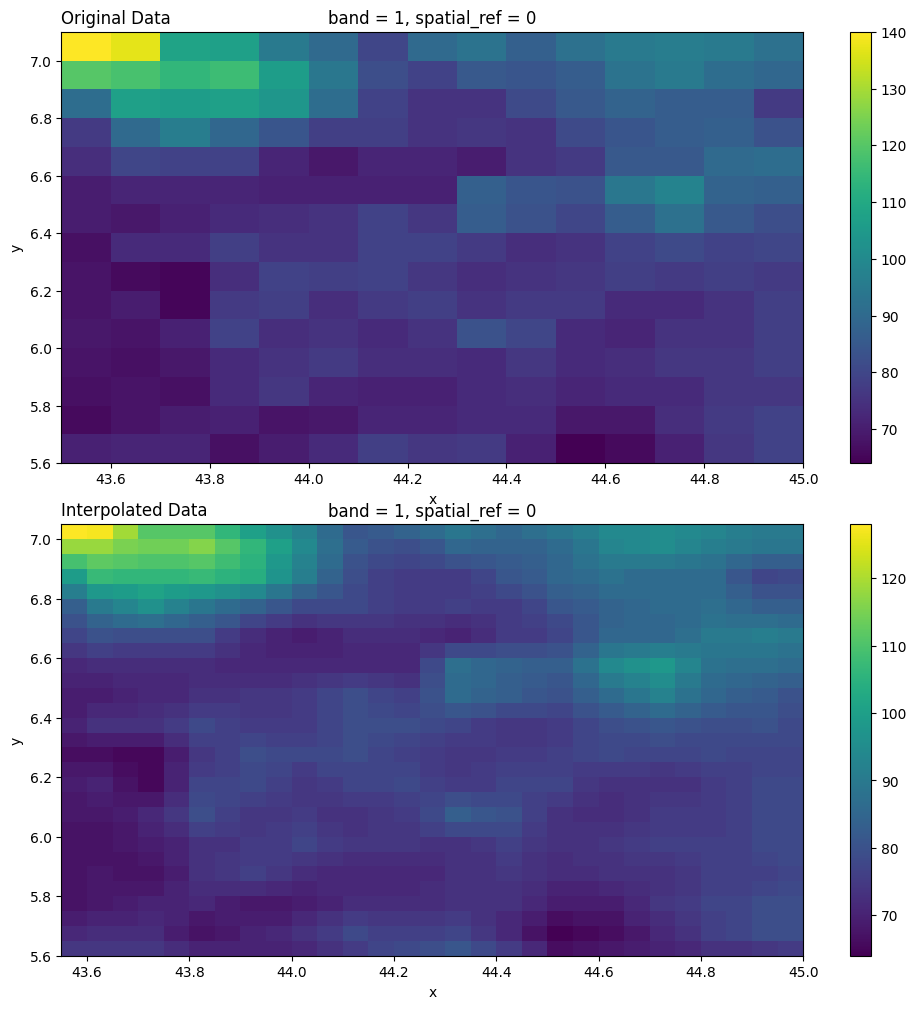

In [7]:
figure, axis = plt.subplots(nrows=2, figsize=(10, 10))
axis[0].set_title("Original Data", loc="left")
axis[1].set_title("Interpolated Data", loc="left")

plt.tight_layout()
data.plot(ax=axis[0])
data_interpolation.plot(ax=axis[1]);